In [1]:
import pandas as pd
import numpy as np
import psycopg2
import boto3
import configparser
import seaborn as sb
import matplotlib.pyplot as plt

## Configuración de la base de datos

In [2]:
config = configparser.ConfigParser()
config.read('proyecto.cfg')

['proyecto.cfg']

## Conexión a base de datos

In [3]:
import sql_queries

try:
    db_conn = psycopg2.connect(
        database = config.get('RDS', 'DB_NAME'),
        user = config.get('RDS', 'DB_USER'),
        password = config.get('RDS', 'DB_PASSWORD'),
        host = config.get('RDS', 'DB_HOST'),
        port = config.get('RDS', 'DB_PORT')
    )
    cursor = db_conn.cursor()
    cursor.execute(sql_queries.DDL_QUERY)
    db_conn.commit()
    print("Base de datos creada exitosamente.")
except Exception as ex:
    print("ERROR: Error al crear la base de datos.")
    print(ex)

ERROR: Error al crear la base de datos.
relation "gamesales" already exists



## Carga de datos

In [17]:
def insertDataToSQL(data_dict, table_name):
     postgres_driver = f"""postgresql://{config.get('RDS', 'DB_USER')}:{config.get('RDS', 'DB_PASSWORD')}@{config.get('RDS','DB_HOST')}:{config.get('RDS', 'DB_PORT')}/{config.get('RDS', 'DB_NAME')}"""    
     df_data = pd.DataFrame.from_records(data_dict)
     try:
          response = df_data.to_sql(table_name, postgres_driver, index=False, if_exists='append')
          print(f'Se han insertado {response} nuevos registros.' )
     except Exception as ex:
          print(ex)

In [18]:
import csv

sql_data = [*csv.DictReader(open('Video_Games_Sales_as_at_22_Dec_2016.csv'))]

insertDataToSQL(
    sql_data,
    'gamesales'
)

Se han insertado 719 nuevos registros.


## Análisis de los datos

In [24]:
sql_query = 'SELECT * FROM gamesales'
postgres_driver = f"""postgresql://{config.get('RDS', 'DB_USER')}:{config.get('RDS', 'DB_PASSWORD')}@{config.get('RDS','DB_HOST')}:{config.get('RDS', 'DB_PORT')}/{config.get('RDS', 'DB_NAME')}"""

#Carga de los datos a un dataframe
gamesales = pd.read_sql(sql_query, postgres_driver)
gamesales.info()
%store gamesales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game_id          16719 non-null  object
 1   Name             16719 non-null  object
 2   Platform         16719 non-null  object
 3   Year_of_Release  16719 non-null  object
 4   Genre            16719 non-null  object
 5   Publisher        16719 non-null  object
 6   NA_Sales         16719 non-null  object
 7   EU_Sales         16719 non-null  object
 8   JP_Sales         16719 non-null  object
 9   Other_Sales      16719 non-null  object
 10  Global_Sales     16719 non-null  object
 11  Critic_Score     16719 non-null  object
 12  Critic_Count     16719 non-null  object
 13  User_Score       16719 non-null  object
 14  User_Count       16719 non-null  object
 15  Developer        16719 non-null  object
 16  Rating           16719 non-null  object
dtypes: object(17)
memory usage: 2.2

### Ventas totales por región
* Plataforma

In [4]:
#NA_Sales
plataforma = gamesales[['Platform','NA_Sales']]
plataforma['NA_Sales'] = plataforma['NA_Sales'].astype('float')
plataforma.groupby('Platform').sum().sort_values('NA_Sales',ascending=False)

C:\Users\ccast\AppData\Local\Temp\ipykernel_8376\2466501684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plataforma['NA_Sales'] = plataforma['NA_Sales'].astype('float')


,NA_Sales
Platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.67
PS,336.52
GBA,187.54
XB,186.69
N64,139.02


In [5]:
#EU_Sales
plataforma = gamesales[['Platform','EU_Sales']]
plataforma['EU_Sales'] = plataforma['EU_Sales'].astype('float')
plataforma.groupby('Platform').sum().sort_values('EU_Sales',ascending=False)

C:\Users\ccast\AppData\Local\Temp\ipykernel_8376\4190940016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plataforma['EU_Sales'] = plataforma['EU_Sales'].astype('float')


,EU_Sales
Platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61
DS,188.89
PC,142.44
PS4,141.09
GBA,75.25


In [6]:
#JP_Sales
plataforma = gamesales[['Platform','JP_Sales']]
plataforma['JP_Sales'] = plataforma['JP_Sales'].astype('float')
plataforma.groupby('Platform').sum().sort_values('JP_Sales',ascending=False)

C:\Users\ccast\AppData\Local\Temp\ipykernel_8376\2966933929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plataforma['JP_Sales'] = plataforma['JP_Sales'].astype('float')


,JP_Sales
Platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67
NES,98.65
GB,85.12
PS3,80.19
PSP,76.78


In [7]:
#Other_Sales
plataforma = gamesales[['Platform','Other_Sales']]
plataforma['Other_Sales'] = plataforma['Other_Sales'].astype('float')
plataforma.groupby('Platform').sum().sort_values('Other_Sales',ascending=False)

C:\Users\ccast\AppData\Local\Temp\ipykernel_8376\1416699614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plataforma['Other_Sales'] = plataforma['Other_Sales'].astype('float')


,Other_Sales
Platform,
PS2,193.44
PS3,135.68
X360,85.76
Wii,79.07
DS,59.28
PS4,48.35
PSP,41.42
PS,40.91
PC,22.38


C:\Users\ccast\AppData\Local\Temp\ipykernel_8376\2740143081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plataforma['Global_Sales'] = plataforma['Global_Sales'].astype('float')


          Global_Sales
Platform              
PS2            1255.64
X360            971.63
PS3             939.43
Wii             908.13
DS              807.10
PS              730.68
GBA             318.50
PS4             314.23
PSP             294.30
PC              260.30
3DS             259.09
XB              258.26
GB              255.45
NES             251.07
N64             218.88
SNES            200.05
GC              199.36
XOne            159.44
2600             97.08
WiiU             82.16
PSV              54.12
SAT              33.59
GEN              30.78
DC               15.97
SCD               1.87
NG                1.44
WS                1.42
TG16              0.16
3DO               0.10
GG                0.04
PCFX              0.03


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

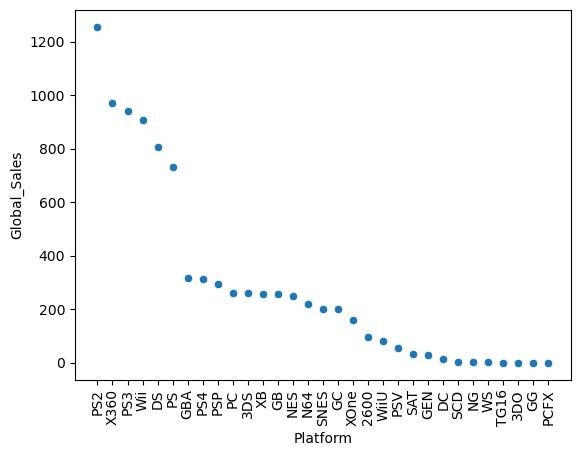

In [8]:
#Global_Sales
plataforma = gamesales[['Platform','Global_Sales']]
plataforma['Global_Sales'] = plataforma['Global_Sales'].astype('float')
print(plataforma.groupby('Platform').sum().sort_values('Global_Sales',ascending=False))
plot = sb.scatterplot(data = plataforma.groupby('Platform').sum().sort_values('Global_Sales',ascending=False),
               x='Platform',
               y='Global_Sales')
plt.setp(plot.get_xticklabels(),rotation=90)

* Año de lanzamiento

                 Global_Sales
Year_of_Release              
2008                   671.79
2009                   658.88
2007                   605.37
2010                   590.59
2006                   518.22
2011                   507.79
2005                   458.31
2004                   419.05
2002                   395.51
2013                   361.24
2003                   357.80
2012                   355.84
2014                   331.51
2001                   331.47
2015                   268.05
1998                   256.45
1999                   251.25
2000                   201.58
1997                   200.98
1996                   199.15
2016                   130.10
N/A                     98.96
1995                    88.11
1994                    79.18
1992                    76.17
1989                    73.45
1985                    53.94
1984                    50.36
1990                    49.39
1993                    48.40
1988                    47.22
1986      

C:\Users\ccast\AppData\Local\Temp\ipykernel_8376\433162047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  año['Global_Sales'] = año['Global_Sales'].astype('float')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

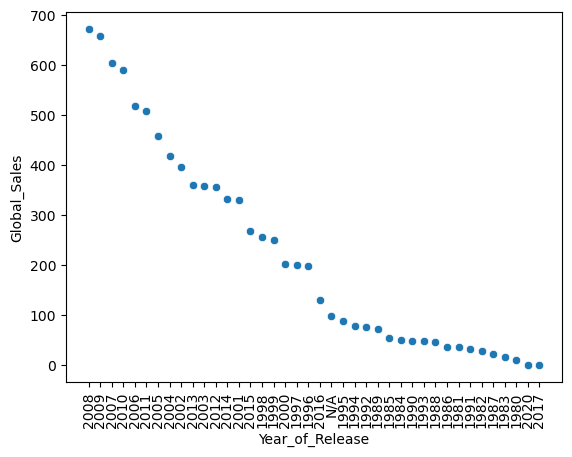

In [9]:
#Global_Sales
año = gamesales[['Year_of_Release','Global_Sales']]
año['Global_Sales'] = año['Global_Sales'].astype('float')
print(año.groupby('Year_of_Release').sum().sort_values('Global_Sales',ascending=False))
plot = sb.scatterplot(data = año.groupby('Year_of_Release').sum().sort_values('Global_Sales',ascending=False),
               x='Year_of_Release',
               y='Global_Sales')
plt.setp(plot.get_xticklabels(),rotation=90)

* Género

              Global_Sales
Genre                     
Action             1745.27
Sports             1332.00
Shooter            1052.94
Role-Playing        934.40
Platform            828.08
Misc                803.18
Racing              728.90
Fighting            447.48
Simulation          390.42
Puzzle              243.02
Adventure           237.69
Strategy            174.50
                      2.42


C:\Users\ccast\AppData\Local\Temp\ipykernel_8376\3886559351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genero['Global_Sales'] = genero['Global_Sales'].astype('float')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

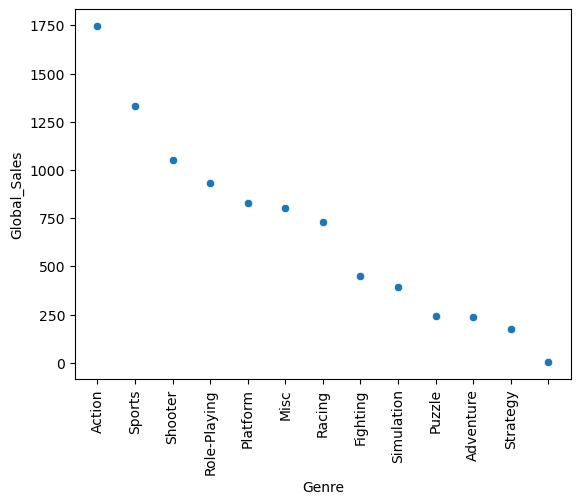

In [10]:
#Global_Sales
genero = gamesales[['Genre','Global_Sales']]
genero['Global_Sales'] = genero['Global_Sales'].astype('float')
print(genero.groupby('Genre').sum().sort_values('Global_Sales',ascending=False))
plot = sb.scatterplot(data = genero.groupby('Genre').sum().sort_values('Global_Sales',ascending=False),
               x='Genre',
               y='Global_Sales')
plt.setp(plot.get_xticklabels(),rotation=90)

* Publisher

                             Global_Sales
Publisher                                
Nintendo                          1788.81
Electronic Arts                   1116.96
Activision                         731.16
Sony Computer Entertainment        606.48
Ubisoft                            471.61
...                                   ...
Naxat Soft                           0.01
Boost On                             0.01
UIG Entertainment                    0.01
EON Digital Entertainment            0.01
Media Entertainment                  0.01

[583 rows x 1 columns]


C:\Users\ccast\AppData\Local\Temp\ipykernel_8376\3745566904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publisher['Global_Sales'] = publisher['Global_Sales'].astype('float')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

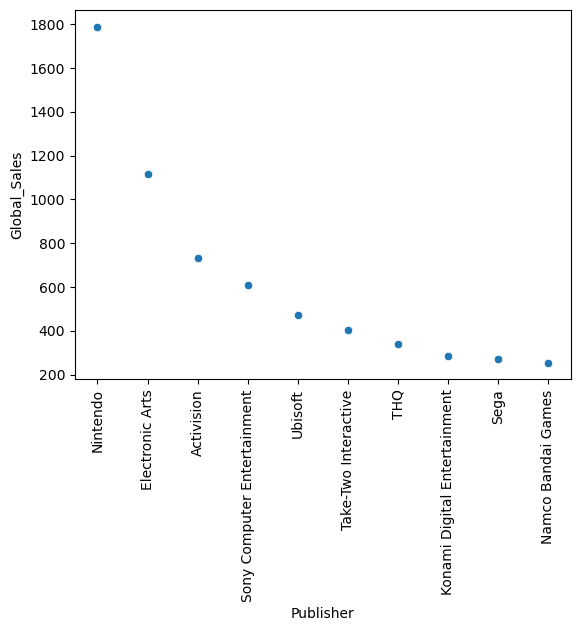

In [11]:
#Global_Sales
publisher = gamesales[['Publisher','Global_Sales']]
publisher['Global_Sales'] = publisher['Global_Sales'].astype('float')
print(publisher.groupby('Publisher').sum().sort_values('Global_Sales',ascending=False))
plot = sb.scatterplot(data = publisher.groupby('Publisher').sum().sort_values('Global_Sales',ascending=False).iloc[:10],
               x='Publisher',
               y='Global_Sales')
plt.setp(plot.get_xticklabels(),rotation=90)

## Mejor plataforma
Como vimos anteriormente, el PS2 es la consola con mejores ventas globales a la fecha de los datos.

In [15]:
ps2 = gamesales.loc[gamesales['Platform']=='PS2']
print(
    ps2['Global_Sales'].isnull().values.any()
)
ps2 = ps2.loc[ps2['Critic_Score'] != '']
ps2['Critic_Score'] = ps2['Critic_Score'].astype('float')

False


* Juego con las mejores ventas

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

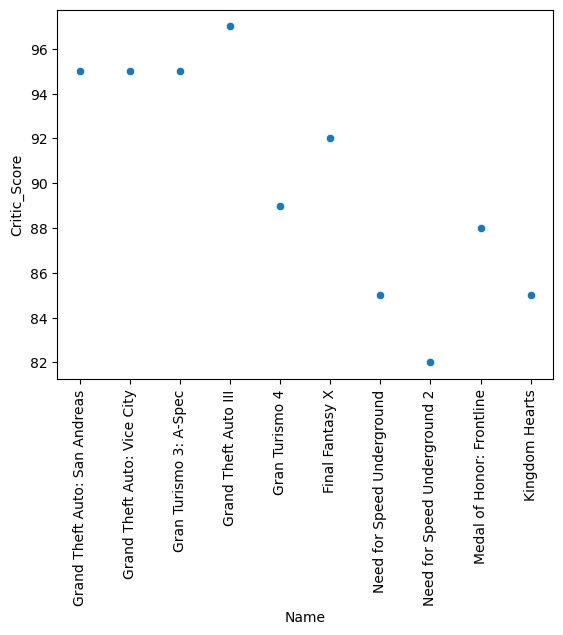

In [16]:
ps2 = ps2.loc[ps2['Critic_Score'].sort_values(ascending=False)>=80]
plot = sb.scatterplot(data=ps2.iloc[:10],
               x='Name',
               y='Critic_Score')
plt.setp(plot.get_xticklabels(),rotation=90)

In [22]:
ps2 = gamesales.loc[gamesales['Platform']=='PS2']
print(
    ps2['Global_Sales'].isnull().values.any()
)
ps2 = ps2.loc[ps2['User_Score'] != '']
ps2['User_Score'] = ps2['User_Score'].astype('float')

False


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

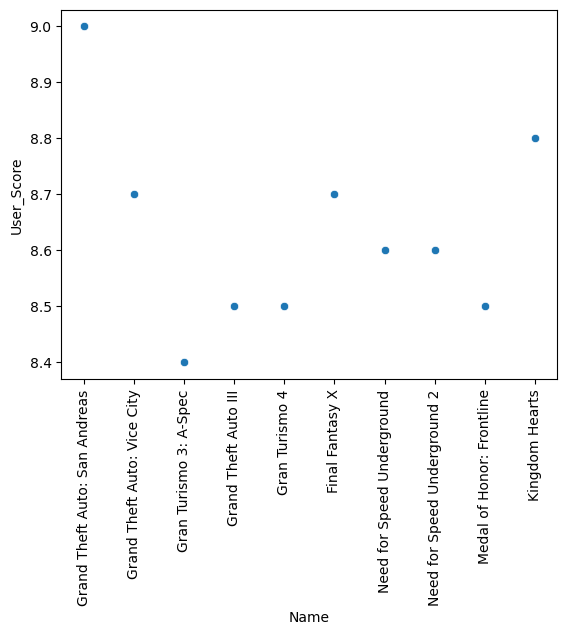

In [23]:
ps2 = ps2.loc[ps2['User_Score'].sort_values(ascending=False)>=8]
plot = sb.scatterplot(data=ps2.iloc[:10],
               x='Name',
               y='User_Score')
plt.setp(plot.get_xticklabels(),rotation=90)